# Credit Scoring Model

**Objective**: Predict an individual's creditworthiness using structured financial data.

**Techniques Used**:
- Logistic Regression and Random Forest
- Feature scaling, ROC-AUC, Confusion Matrix
- Evaluation metrics: Accuracy, Precision, Recall, F1-score

**Output**: A binary classification indicating if an individual is “creditworthy” or not.



In [1]:
# CREDIT SCORING MODEL – WITH METRICS & VISUALIZATIONS

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve


In [2]:
# Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target


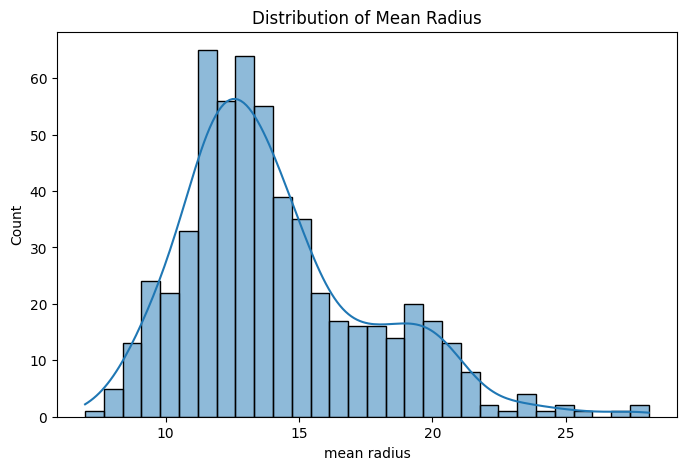

In [3]:
# EDA – Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['mean radius'], bins=30, kde=True)
plt.title("Distribution of Mean Radius")
plt.show()


In [4]:
# Train-test split
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
# Models
log_model = LogisticRegression()
rf_model = RandomForestClassifier()

log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)



RandomForestClassifier()

In [9]:
# Predict
y_pred_log = log_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Random Forest Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Logistic Regression ROC-AUC: 1.00
Random Forest ROC-AUC: 1.00


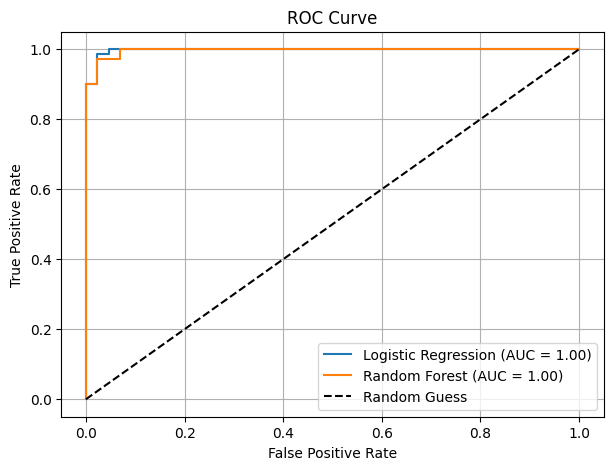

In [11]:
# ROC-AUC
log_auc = roc_auc_score(y_test, log_model.predict_proba(X_test)[:,1])
rf_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])
print(f"Logistic Regression ROC-AUC: {log_auc:.2f}")
print(f"Random Forest ROC-AUC: {rf_auc:.2f}")

# Plot ROC Curve
fpr_log, tpr_log, _ = roc_curve(y_test, log_model.predict_proba(X_test)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(7, 5))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {log_auc:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


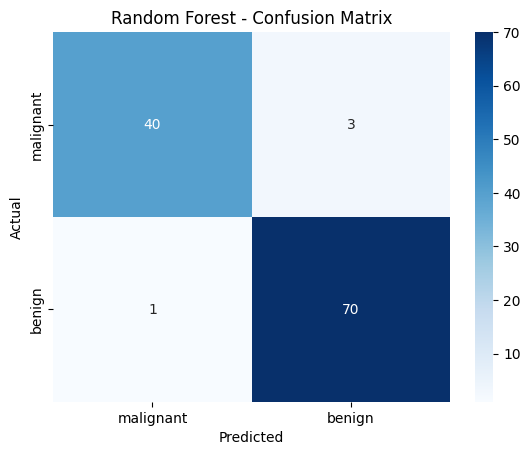

In [12]:
# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()